In [1]:
# get images using wget

!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
!tar zxvf 17flowers.tgz
!mkdir data

--2024-04-22 17:51:01--  https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-17/17flowers.tgz [following]
--2024-04-22 17:51:03--  https://thor.robots.ox.ac.uk/datasets/flowers-17/17flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60270631 (57M) [application/octet-stream]
Saving to: ‘17flowers.tgz’

17flowers.tgz       100%[===================>]  57.48M   897KB/s    in 18s     

2024-04-22 17:51:22 (3.17 MB/s) - ‘17flowers.tgz’ saved [60270631/60270631]

jpg/files.txt
jpg/files.txt~
jpg/image_0001.jpg
jpg/image_0002.jpg
jpg/image_000

In [3]:
# change directory name

!mkdir dataset
!mv jpg dataset/flowers

In [2]:
# install libraries

!pip install numpy
!pip install matplotlib
!pip install pillow

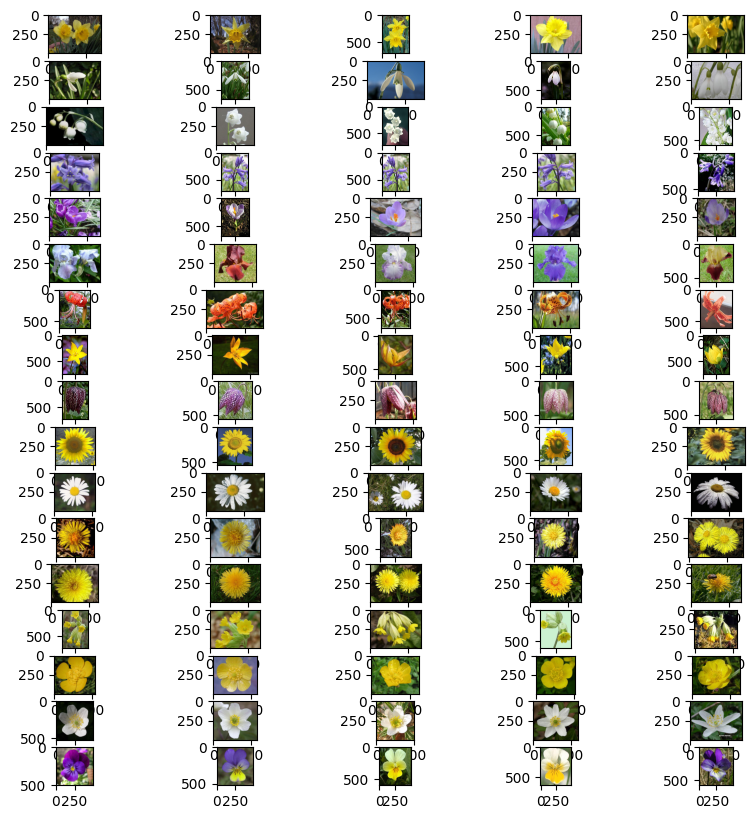

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 17

def generate_img_path(n):
    return f"dataset/flowers/image_{n:0>4}.jpg"

# display first 5 images from each of the 17 categories
for i in range(0, 17):
    for j in range(0, 5):
        img = Image.open(generate_img_path(80 * i + j + 1))
        fig.add_subplot(rows, columns, 5 * i + j + 1)
        plt.imshow(img)
plt.show()


In [11]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.models import alexnet

In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set dataset path
dataset_path = 'dataset/flowers'  # replace path to the dataset
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all image file names
image_files = [file for file in os.listdir(dataset_path) if file.endswith('.jpg')]

# Split the dataset into train and temp with temp being the sum of val and test
train_files, temp_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Split the temp set equally into validation and test
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

# Function to copy files to a target directory
def copy_files(files, target_dir):
    for file in files:
        shutil.copy(os.path.join(dataset_path, file), os.path.join(target_dir, file))

# Copy files to their respective directories
copy_files(train_files, train_dir)
copy_files(val_files, val_dir)
copy_files(test_files, test_dir)


In [16]:
import os
import shutil
from pathlib import Path

# The dataset root directory
root_dir = Path('dataset/flowers')

# Define function to create class directories
def create_class_dirs(base_dir):
    for i in range(17):
        class_dir = base_dir / f'class_{i}'
        class_dir.mkdir(parents=True, exist_ok=True)

# Define function to get class directory based on image index
def get_class_dir(image_index):
    class_index = image_index // 80
    return f'class_{class_index}'

# Create class directories for train, test, and val
for subdir in ['train', 'test', 'val']:
    create_class_dirs(root_dir / subdir)

# Function to move images to respective class directories
def move_images_to_class_dirs(subdir):
    for img_file in (root_dir / subdir).glob('image_*.jpg'):
        # Get the image index from the file name
        image_index = int(img_file.stem.split('_')[1]) - 1  # index starts from 0
        # Get the corresponding class directory
        class_dir = get_class_dir(image_index)
        # Move the image to the class directory
        img_file.rename(root_dir / subdir / class_dir / img_file.name)

# Move images for each of the subdirectories
for subdir in ['train', 'test', 'val']:
    move_images_to_class_dirs(subdir)


In [17]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 28.9 MB/s eta 0:00:0000:010:01
